In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fraud data.csv')

In [3]:
data.columns

Index(['Transaction_Amount', 'Merchant_Category', 'User_Country',
       'Transaction_Country', 'Device_Type', 'Transaction_Day',
       'User_Avg_Spend', 'User_Transaction_Frequency', 'status', 'Is_Fraud'],
      dtype='object')

In [4]:
data.head()

,Transaction_Amount,Merchant_Category,User_Country,Transaction_Country,Device_Type,Transaction_Day,User_Avg_Spend,User_Transaction_Frequency,status,Is_Fraud
0,27067,Hotels,China,China,Laptop,Weekend,6753,7,1,Fraud
1,16167,Bakeries,China,Brazil,Tablet,Weekend,4457,3,1,Fraud
2,3433,Taxi services,Argentina,Argentina,Mobile,Weekend,3687,2,0,No Fraud
3,24272,Liquor stores,Australia,South Africa,Mobile,Weekday,6403,9,1,Fraud
4,7700,Clothing stores,Australia,South Africa,Laptop,Weekday,6671,8,1,Fraud


In [5]:
categorical_col = ['Merchant_Category', 'User_Country', 'Transaction_Country', 'Device_Type', 'Transaction_Day', 'Is_Fraud']

In [6]:
for i in categorical_col:
    categories = data[i].unique()
    print(f'{i}: {categories}')

Merchant_Category: ['Hotels' 'Bakeries' 'Taxi services' 'Liquor stores' 'Clothing stores'
 'Grocery stores' 'Adult websites' 'Department stores' 'Airlines'
 'Bitcoin exchanges']
User_Country: ['China' 'Argentina' 'Australia' 'Kenya' 'Japan' 'Italy' 'South Korea'
 'Brazil' 'India' 'Canada' 'Germany' 'Russia' 'Nigeria' 'France' 'Spain'
 'Mexico' 'America' 'United Kingdom' 'South Africa']
Transaction_Country: ['China' 'Brazil' 'Argentina' 'South Africa' 'Kenya' 'Japan' 'Nigeria'
 'South Korea' 'India' 'Indonesia' 'Pakistan' 'Germany' 'Vietnam' 'Canada'
 'France' 'Australia' 'Philippines' 'Russia' 'Mexico' 'America' 'Italy'
 'Spain' 'United Kingdom']
Device_Type: ['Laptop' 'Tablet' 'Mobile']
Transaction_Day: ['Weekend' 'Weekday']
Is_Fraud: ['Fraud' 'No Fraud']


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
for col in categorical_col:
    data[col] = le.fit_transform(data[col])
    print(le.classes_)

['Adult websites' 'Airlines' 'Bakeries' 'Bitcoin exchanges'
 'Clothing stores' 'Department stores' 'Grocery stores' 'Hotels'
 'Liquor stores' 'Taxi services']
['America' 'Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France'
 'Germany' 'India' 'Italy' 'Japan' 'Kenya' 'Mexico' 'Nigeria' 'Russia'
 'South Africa' 'South Korea' 'Spain' 'United Kingdom']
['America' 'Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France'
 'Germany' 'India' 'Indonesia' 'Italy' 'Japan' 'Kenya' 'Mexico' 'Nigeria'
 'Pakistan' 'Philippines' 'Russia' 'South Africa' 'South Korea' 'Spain'
 'United Kingdom' 'Vietnam']
['Laptop' 'Mobile' 'Tablet']
['Weekday' 'Weekend']
['Fraud' 'No Fraud']


In [9]:
data

,Transaction_Amount,Merchant_Category,User_Country,Transaction_Country,Device_Type,Transaction_Day,User_Avg_Spend,User_Transaction_Frequency,status,Is_Fraud
0,27067,7,5,5,0,1,6753,7,1,0
1,16167,2,5,3,2,1,4457,3,1,0
2,3433,9,1,1,1,1,3687,2,0,1
3,24272,8,2,18,1,0,6403,9,1,0
4,7700,4,2,18,0,0,6671,8,1,0
...,...,...,...,...,...,...,...,...,...,...
1995,28787,6,13,9,0,0,9602,6,1,0
1996,15859,8,11,22,1,1,7758,8,1,0
1997,6799,1,15,8,2,1,5298,10,1,0
1998,6969,5,13,14,1,0,8050,2,0,1


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier()

In [12]:
X = data.drop(['status', 'Is_Fraud'], axis=1)

In [13]:
y = data.Is_Fraud

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=30, test_size=0.2)

In [16]:
print(X_train.shape)
print(y_train.shape)

(1600, 8)
(1600,)


In [17]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
model_pred = model.predict(X_test)

In [19]:
model_pred[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [20]:
model.predict(X_test[:9])

array([1, 0, 0, 0, 0, 1, 1, 0, 0])

In [21]:
y_test[:10]

1856    1
364     0
1948    1
1458    0
609     0
1471    1
6       1
1541    0
1017    0
1055    1
Name: Is_Fraud, dtype: int32

In [22]:
X_test[:9]

,Transaction_Amount,Merchant_Category,User_Country,Transaction_Country,Device_Type,Transaction_Day,User_Avg_Spend,User_Transaction_Frequency
1856,5565,9,12,13,2,0,6230,1
364,16009,4,7,13,1,0,2857,9
1948,13091,4,13,14,0,1,7666,2
1458,21243,4,16,17,1,1,7697,1
609,22586,8,17,8,0,1,9890,1
1471,13459,9,13,14,2,0,9810,2
6,4221,4,10,11,2,1,4965,2
1541,19176,0,17,22,0,0,4094,1
1017,11830,7,0,0,0,0,7089,4


In [23]:
model.predict([[5565, taxi_service, mexico, mexico, tablet, weekday, 6230, 1]])

NameError: name 'taxi_service' is not defined

In [24]:
model.score(X_test, y_test)

0.9375

In [25]:
model.predict_proba(X_test)[:10]

array([[0.05, 0.95],
       [1.  , 0.  ],
       [0.81, 0.19],
       [0.87, 0.13],
       [0.86, 0.14],
       [0.15, 0.85],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.84, 0.16],
       [0.02, 0.98]])

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)

In [27]:
cm

array([[261,  19],
       [  6, 114]], dtype=int64)

In [28]:
import seaborn as sns

In [29]:
2.4e+02

240.0

Text(58.222222222222214, 0.5, 'Truth')

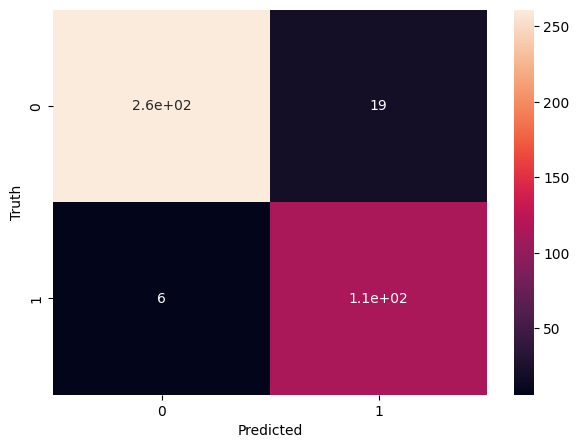

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       280
           1       0.86      0.95      0.90       120

    accuracy                           0.94       400
   macro avg       0.92      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



In [33]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
model.predict([[27067, 7, 5, 5, 0, 1, 6753, 7]])

C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict([[15643, 7, 10, 9, 0, 0, 2359, 4]])

C:\Users\Leinad\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
import pandas as pd

In [4]:
from tabula import read_pdf
df = read_pdf("1_5102770689266419117.pdf")

'pages' argument isn't specified.Will extract only from page 1 by default.


JavaNotFoundError: `java` command is not found from this Python process.Please ensure Java is installed and PATH is set for `java`

In [ ]:
df = pd.re